In [151]:
import numpy
!pip install pysindy numpy pyGPGO matplotlib scikit-learn scipy pathlib pandas cvxpy gurobipy
#installing all dependencies

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


In [1]:
import numpy as np
import matplotlib.pyplot as plst
from mpl_toolkits import mplot3d
import pysindy as ps
import random
import pyGPGO
from pysindy import PolynomialLibrary, FourierLibrary 
from pyGPGO.surrogates.GaussianProcess import GaussianProcess
from pyGPGO.covfunc import squaredExponential
from pyGPGO.acquisition import Acquisition
from pyGPGO.GPGO import GPGO
from sklearn.metrics import mean_squared_error
#importing necessary modules

In [2]:
random_integers = [random.randint(1, 100000) for _ in range(1000)]

def err(param1, param2):

    _model, x_data = get_model_and_data(param1, param2)
    alpha = 1
    score = _model.score(x_data,metric = mean_squared_error) + alpha * _model.complexity
    # ++ complexity
    
    return score


TIME = np.linspace(0, 1, 1000)

def get_model_and_data(param1, param2):
    #data_set = []
    # for it in range(1000):
    #     data_set.append(it)
    x = np.array(random_integers)
    #     model = ps.SINDy(feature_names=["x"])
    #     model.fit(x,t = time)
    #     x_derivative = model.differentiate(x)
    x_data = x
    #    x_data_derivative = x_derivative
    differentiation_method = ps.FiniteDifference(order=2)
    poly_lib = ps.PolynomialLibrary(degree=int(param1))
    trig_lib = ps.FourierLibrary(n_frequencies=int(param2))
    custom_lib = poly_lib + trig_lib
    feature_library = custom_lib
    optimizer = ps.STLSQ(threshold=0.2)
    model = ps.SINDy(
        differentiation_method=differentiation_method,
        feature_library=custom_lib,
        optimizer=optimizer,
        feature_names=["x"])
    model.fit(x_data, t=TIME)
    return model, x_data

#defining the objective function which takes as inputs the degree and frequency of the libraries
#pentru fiecare pereche param1 si param2, functia err va calcula cu score eroarea dintre aproximarea facuta de model
#si derivata reala

In [3]:
#domeniu1 = np.arange(1, 101)
#domeniu2 = np.arange(1, 101)

cov = squaredExponential()
surogate = GaussianProcess(cov)
acq = Acquisition(mode = 'ExpectedImprovement')
params = {'param1' : ('int',[2,100]),
          'param2' : ('int',[2,100])}
np.random.seed(23)
gpgo = GPGO(surogate, acq, err,params)

gpgo.run(max_iter = 100)
print(gpgo.GP.y)

Evaluation 	 Proposed point 	  Current eval. 	 Best eval.


/e/others/andrei/2024-01-05_09-38-00/venv/lib/python3.10/site-packages/pysindy/utils/axes.py:98: RuntimeWarning: invalid value encountered in cast
  arr = super(AxesArray, self).__array_function__(func, types, args, kwargs)
/e/others/andrei/2024-01-05_09-38-00/venv/lib/python3.10/site-packages/pysindy/utils/axes.py:98: RuntimeWarning: invalid value encountered in cast
  arr = super(AxesArray, self).__array_function__(func, types, args, kwargs)
/e/others/andrei/2024-01-05_09-38-00/venv/lib/python3.10/site-packages/pysindy/utils/axes.py:98: RuntimeWarning: invalid value encountered in cast
  arr = super(AxesArray, self).__array_function__(func, types, args, kwargs)
/e/others/andrei/2024-01-05_09-38-00/venv/lib/python3.10/site-packages/pysindy/utils/axes.py:98: RuntimeWarning: invalid value encountered in cast
  arr = super(AxesArray, self).__array_function__(func, types, args, kwargs)
/e/others/andrei/2024-01-05_09-38-00/venv/lib/python3.10/site-packages/pysindy/utils/axes.py:98: Runtime

init   	 [85. 42.]. 	  2122973774.8662424 	 2122973774.8662424
init   	 [75. 56.]. 	  2122973774.8662424 	 2122973774.8662424
init   	 [33. 78.]. 	  2122973774.8662424 	 2122973774.8662424


/e/others/andrei/2024-01-05_09-38-00/venv/lib/python3.10/site-packages/pysindy/utils/axes.py:98: RuntimeWarning: invalid value encountered in cast
  arr = super(AxesArray, self).__array_function__(func, types, args, kwargs)
/e/others/andrei/2024-01-05_09-38-00/venv/lib/python3.10/site-packages/pysindy/utils/axes.py:98: RuntimeWarning: invalid value encountered in cast
  arr = super(AxesArray, self).__array_function__(func, types, args, kwargs)


1      	 [93. 41.]. 	  2122973774.8662424 	 2122973774.8662424


/e/others/andrei/2024-01-05_09-38-00/venv/lib/python3.10/site-packages/pysindy/utils/axes.py:98: RuntimeWarning: invalid value encountered in cast
  arr = super(AxesArray, self).__array_function__(func, types, args, kwargs)
/e/others/andrei/2024-01-05_09-38-00/venv/lib/python3.10/site-packages/pysindy/utils/axes.py:98: RuntimeWarning: invalid value encountered in cast
  arr = super(AxesArray, self).__array_function__(func, types, args, kwargs)


2      	 [56. 79.]. 	  2122973774.8662424 	 2122973774.8662424


/e/others/andrei/2024-01-05_09-38-00/venv/lib/python3.10/site-packages/pysindy/utils/axes.py:98: RuntimeWarning: invalid value encountered in cast
  arr = super(AxesArray, self).__array_function__(func, types, args, kwargs)
/e/others/andrei/2024-01-05_09-38-00/venv/lib/python3.10/site-packages/pysindy/utils/axes.py:98: RuntimeWarning: invalid value encountered in cast
  arr = super(AxesArray, self).__array_function__(func, types, args, kwargs)


3      	 [85. 42.]. 	  2122973774.8662424 	 2122973774.8662424


/e/others/andrei/2024-01-05_09-38-00/venv/lib/python3.10/site-packages/pysindy/utils/axes.py:98: RuntimeWarning: invalid value encountered in cast
  arr = super(AxesArray, self).__array_function__(func, types, args, kwargs)
/e/others/andrei/2024-01-05_09-38-00/venv/lib/python3.10/site-packages/pysindy/utils/axes.py:98: RuntimeWarning: invalid value encountered in cast
  arr = super(AxesArray, self).__array_function__(func, types, args, kwargs)
/e/others/andrei/2024-01-05_09-38-00/venv/lib/python3.10/site-packages/pysindy/utils/axes.py:98: RuntimeWarning: invalid value encountered in cast
  arr = super(AxesArray, self).__array_function__(func, types, args, kwargs)


4      	 [52. 60.]. 	  2122973774.8662424 	 2122973774.8662424


/e/others/andrei/2024-01-05_09-38-00/venv/lib/python3.10/site-packages/pysindy/utils/axes.py:98: RuntimeWarning: invalid value encountered in cast
  arr = super(AxesArray, self).__array_function__(func, types, args, kwargs)
/e/others/andrei/2024-01-05_09-38-00/venv/lib/python3.10/site-packages/pysindy/utils/axes.py:98: RuntimeWarning: invalid value encountered in cast
  arr = super(AxesArray, self).__array_function__(func, types, args, kwargs)


5      	 [54. 10.]. 	  2122973774.8662424 	 2122973774.8662424


/e/others/andrei/2024-01-05_09-38-00/venv/lib/python3.10/site-packages/pysindy/utils/axes.py:98: RuntimeWarning: invalid value encountered in cast
  arr = super(AxesArray, self).__array_function__(func, types, args, kwargs)


6      	 [91. 25.]. 	  2122973774.8662424 	 2122973774.8662424


/e/others/andrei/2024-01-05_09-38-00/venv/lib/python3.10/site-packages/pysindy/utils/axes.py:98: RuntimeWarning: invalid value encountered in cast
  arr = super(AxesArray, self).__array_function__(func, types, args, kwargs)
/e/others/andrei/2024-01-05_09-38-00/venv/lib/python3.10/site-packages/pysindy/utils/axes.py:98: RuntimeWarning: invalid value encountered in cast
  arr = super(AxesArray, self).__array_function__(func, types, args, kwargs)


7      	 [62. 46.]. 	  2122973774.8662424 	 2122973774.8662424


/e/others/andrei/2024-01-05_09-38-00/venv/lib/python3.10/site-packages/pysindy/utils/axes.py:98: RuntimeWarning: invalid value encountered in cast
  arr = super(AxesArray, self).__array_function__(func, types, args, kwargs)
/e/others/andrei/2024-01-05_09-38-00/venv/lib/python3.10/site-packages/pysindy/utils/axes.py:98: RuntimeWarning: invalid value encountered in cast
  arr = super(AxesArray, self).__array_function__(func, types, args, kwargs)


8      	 [34. 40.]. 	  2122973774.8662424 	 2122973774.8662424


/e/others/andrei/2024-01-05_09-38-00/venv/lib/python3.10/site-packages/pysindy/utils/axes.py:98: RuntimeWarning: invalid value encountered in cast
  arr = super(AxesArray, self).__array_function__(func, types, args, kwargs)
/e/others/andrei/2024-01-05_09-38-00/venv/lib/python3.10/site-packages/pysindy/utils/axes.py:98: RuntimeWarning: invalid value encountered in cast
  arr = super(AxesArray, self).__array_function__(func, types, args, kwargs)


9      	 [19. 17.]. 	  2122973774.8662424 	 2122973774.8662424


/e/others/andrei/2024-01-05_09-38-00/venv/lib/python3.10/site-packages/pysindy/utils/axes.py:98: RuntimeWarning: invalid value encountered in cast
  arr = super(AxesArray, self).__array_function__(func, types, args, kwargs)
/e/others/andrei/2024-01-05_09-38-00/venv/lib/python3.10/site-packages/pysindy/utils/axes.py:98: RuntimeWarning: invalid value encountered in cast
  arr = super(AxesArray, self).__array_function__(func, types, args, kwargs)


10     	 [76. 57.]. 	  2122973774.8662424 	 2122973774.8662424


/e/others/andrei/2024-01-05_09-38-00/venv/lib/python3.10/site-packages/pysindy/utils/axes.py:98: RuntimeWarning: invalid value encountered in cast
  arr = super(AxesArray, self).__array_function__(func, types, args, kwargs)
/e/others/andrei/2024-01-05_09-38-00/venv/lib/python3.10/site-packages/pysindy/utils/axes.py:98: RuntimeWarning: invalid value encountered in cast
  arr = super(AxesArray, self).__array_function__(func, types, args, kwargs)


11     	 [54. 10.]. 	  2122973774.8662424 	 2122973774.8662424


/e/others/andrei/2024-01-05_09-38-00/venv/lib/python3.10/site-packages/pysindy/utils/axes.py:98: RuntimeWarning: invalid value encountered in cast
  arr = super(AxesArray, self).__array_function__(func, types, args, kwargs)
/e/others/andrei/2024-01-05_09-38-00/venv/lib/python3.10/site-packages/pysindy/utils/axes.py:98: RuntimeWarning: invalid value encountered in cast
  arr = super(AxesArray, self).__array_function__(func, types, args, kwargs)


12     	 [19. 17.]. 	  2122973774.8662424 	 2122973774.8662424


/e/others/andrei/2024-01-05_09-38-00/venv/lib/python3.10/site-packages/pysindy/utils/axes.py:98: RuntimeWarning: invalid value encountered in cast
  arr = super(AxesArray, self).__array_function__(func, types, args, kwargs)
/e/others/andrei/2024-01-05_09-38-00/venv/lib/python3.10/site-packages/pysindy/utils/axes.py:98: RuntimeWarning: invalid value encountered in cast
  arr = super(AxesArray, self).__array_function__(func, types, args, kwargs)


13     	 [30. 90.]. 	  2122973774.8662424 	 2122973774.8662424


/e/others/andrei/2024-01-05_09-38-00/venv/lib/python3.10/site-packages/pysindy/utils/axes.py:98: RuntimeWarning: invalid value encountered in cast
  arr = super(AxesArray, self).__array_function__(func, types, args, kwargs)
/e/others/andrei/2024-01-05_09-38-00/venv/lib/python3.10/site-packages/pysindy/utils/axes.py:98: RuntimeWarning: invalid value encountered in cast
  arr = super(AxesArray, self).__array_function__(func, types, args, kwargs)


LinAlgError: 17-th leading minor of the array is not positive definite

t_list=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
point_param1_list=[93.0, 56.0, 85.0, 52.0, 54.0, 91.0, 62.0, 34.0, 19.0, 76.0, 54.0, 19.0, 30.0, 54.0]
point_param2_list=[41.0, 79.0, 42.0, 60.0, 10.0, 25.0, 46.0, 40.0, 17.0, 57.0, 10.0, 17.0, 90.0, 10.0]
current_eval=[2.12297377e+09 2.12297377e+09 2.12297377e+09 2.12297377e+09
 2.12297377e+09 2.12297377e+09 2.12297377e+09 2.12297377e+09
 2.12297377e+09 2.12297377e+09 2.12297377e+09 2.12297377e+09
 2.12297377e+09 2.12297377e+09]

best_params, best_eval=(array([93., 41.]), 2122973774.8662424)
(x)' = 49730.332 1 + -1.299 x


/e/others/andrei/2024-01-05_09-38-00/venv/lib/python3.10/site-packages/pysindy/utils/axes.py:98: RuntimeWarning: invalid value encountered in cast
  arr = super(AxesArray, self).__array_function__(func, types, args, kwargs)
/e/others/andrei/2024-01-05_09-38-00/venv/lib/python3.10/site-packages/pysindy/utils/axes.py:98: RuntimeWarning: invalid value encountered in cast
  arr = super(AxesArray, self).__array_function__(func, types, args, kwargs)
/e/others/andrei/2024-01-05_09-38-00/venv/lib/python3.10/site-packages/pysindy/utils/axes.py:98: RuntimeWarning: invalid value encountered in cast
  arr = super(AxesArray, self).__array_function__(func, types, args, kwargs)


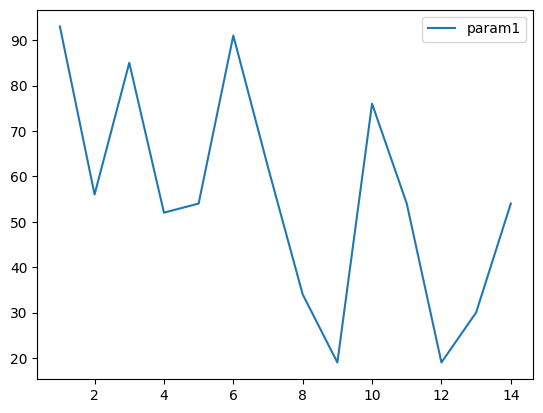

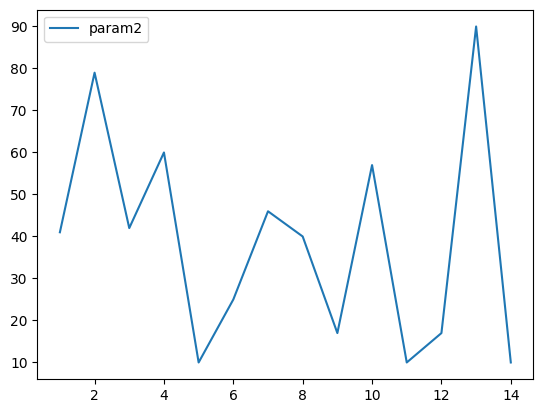

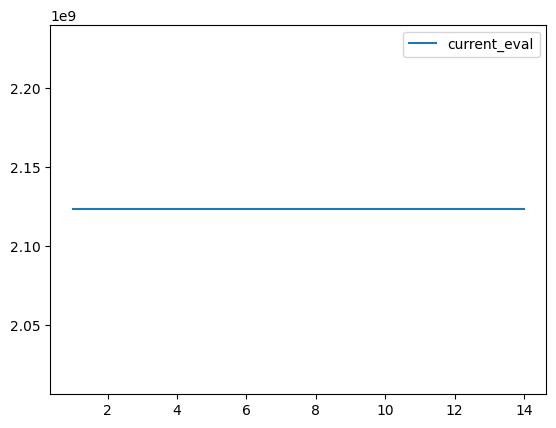

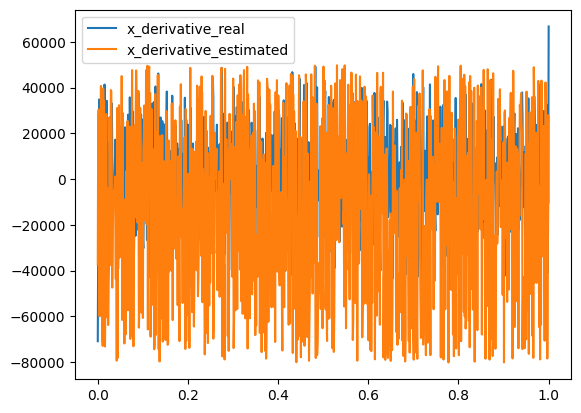

In [11]:
from pysindy.utils import concat_sample_axis, drop_nan_samples
from pysindy.pysindy import _adapt_to_multiple_trajectories, _comprehend_and_validate_inputs


def get_x_dot_and_x_dot_predicted(_model, x, t=None, x_dot=None, u=None, multiple_trajectories=False, metric=err, **metric_kws):
    """this is copy-pasted from pysindy.pysindy.PySINDy.score"""
    if t is None:
        t = _model.t_default

    if not multiple_trajectories:
        x, t, x_dot, u = _adapt_to_multiple_trajectories(x, t, x_dot, u)
        multiple_trajectories = True
    x, x_dot, u = _comprehend_and_validate_inputs(
        x, t, x_dot, u, _model.feature_library
    )

    x_dot_predict = _model.predict(x, u, multiple_trajectories=multiple_trajectories)

    if _model.discrete_time and x_dot is None:
        x_dot_predict = [xd[:-1] for xd in x_dot_predict]

    x, x_dot = _model._process_multiple_trajectories(x, t, x_dot)

    x_dot = concat_sample_axis(x_dot)
    x_dot_predict = concat_sample_axis(x_dot_predict)

    x_dot, x_dot_predict = drop_nan_samples(x_dot, x_dot_predict)
    return x_dot, x_dot_predict


params_list = gpgo.GP.X[3:]
current_eval_list = gpgo.GP.y[3:]

t_list = list(range(1, len(params_list) + 1))
param1_list = [point[0] for point in params_list]
param2_list = [point[1] for point in params_list]


print(f't_list={t_list}')
print(f'point_param1_list={param1_list}')
print(f'point_param2_list={param2_list}')
print(f'current_eval={current_eval_list}')


def plot_subplot(x, y, label):
    subplot = plst.figure().add_subplot()
    subplot.plot(x, y, label = label)
    subplot.legend()

plot_subplot(t_list, param1_list, "param1")
plot_subplot(t_list, param2_list, "param2")
plot_subplot(t_list, current_eval_list, "current_eval")

best_eval = min(current_eval_list)
best_params = params_list[np.where(current_eval_list == best_eval)][0]
print(f'\nbest_params, best_eval={best_params, best_eval}')

model, x_data = get_model_and_data(best_params[0], best_params[1])
model.print() # prints (x)'

x_derivative_real = model.differentiate(x_data)
_, x_derivative_estimated = get_x_dot_and_x_dot_predicted(model, x_data) # NOTE that _ = x_derivative_real

derivative_subplot = plst.figure().add_subplot()
derivative_subplot.plot(TIME, x_derivative_real, label ="x_derivative_real")
derivative_subplot.plot(TIME, x_derivative_estimated, label ="x_derivative_estimated")
derivative_subplot.legend()

In [7]:
"""import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

param1_values = np.arange(2, 101)
param2_values = np.arange(2, 101)

param1, param2 = np.meshgrid(param1_values, param2_values)

# Initialize an array to store the error values
errors = np.zeros_like(param1, dtype=float)

# Calculate the error for each combination of param1 and param2
for i in range(len(param1_values)):
    for j in range(len(param2_values)):
        errors[i, j] = err(param1_values[i], param2_values[j])

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(param1, param2, errors, cmap='viridis')

# Add labels and title
ax.set_xlabel('Ordin Polinom')
ax.set_ylabel('Ordin Trigonometric')
ax.set_zlabel('Error')
ax.set_title('Eroarea in 3D')

# Show the plot
plt.show()
"""

SyntaxError: EOL while scanning string literal (2960107327.py, line 31)